# Visualize training curves 🍑

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['figure.figsize'] = [7, 5]
mpl.rcParams['savefig.pad_inches'] = 0

## Pretraining curves

In [2]:
def plot_pretrain(system):

    train_loss, val_loss, epochs = [], [], []
    plt.style.use("ggplot")

    with open('pretrain/' + system + '/log.txt', 'r') as file:
        for line in file:
            data = eval(line)
            train_loss.append(data['train_loss'])
            val_loss.append(data['val_loss'])
            epochs.append(data['epoch'])

    with open('pretrain/' + system + '/config.txt', 'r') as file:
        for line in file:
            if line.startswith("Training time:"):
                runtime = line.strip().split(" ")[-1]

    best_index = val_loss.index(min(val_loss))
    
    plt.plot(epochs, train_loss, color="royalblue", label=f'Train (low {train_loss[best_index]:.3f})', linewidth=2.5)
    plt.plot(epochs, val_loss, color="lightseagreen", label=f'Validation (low {val_loss[best_index]:.3f})', linewidth=2.5)
    plt.scatter(epochs, train_loss, color="royalblue")
    plt.scatter(epochs, val_loss, color="lightseagreen")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.tick_params(left=False, right=False)
    plt.legend(fontsize=13, fancybox=True, borderpad=0.8, labelspacing=0.8, borderaxespad=1.8, framealpha=0.7, facecolor='white')
    
    print(f"Lowest Validation Loss: {val_loss[best_index]:.5f}")
    print(f"Corresponding Train Loss: {train_loss[best_index]:.5f}")
    print(f"Train time: {runtime}")

    plt.show()

Lowest Validation Loss: 0.05179
Corresponding Train Loss: 0.05176
Train time: 6:04:05


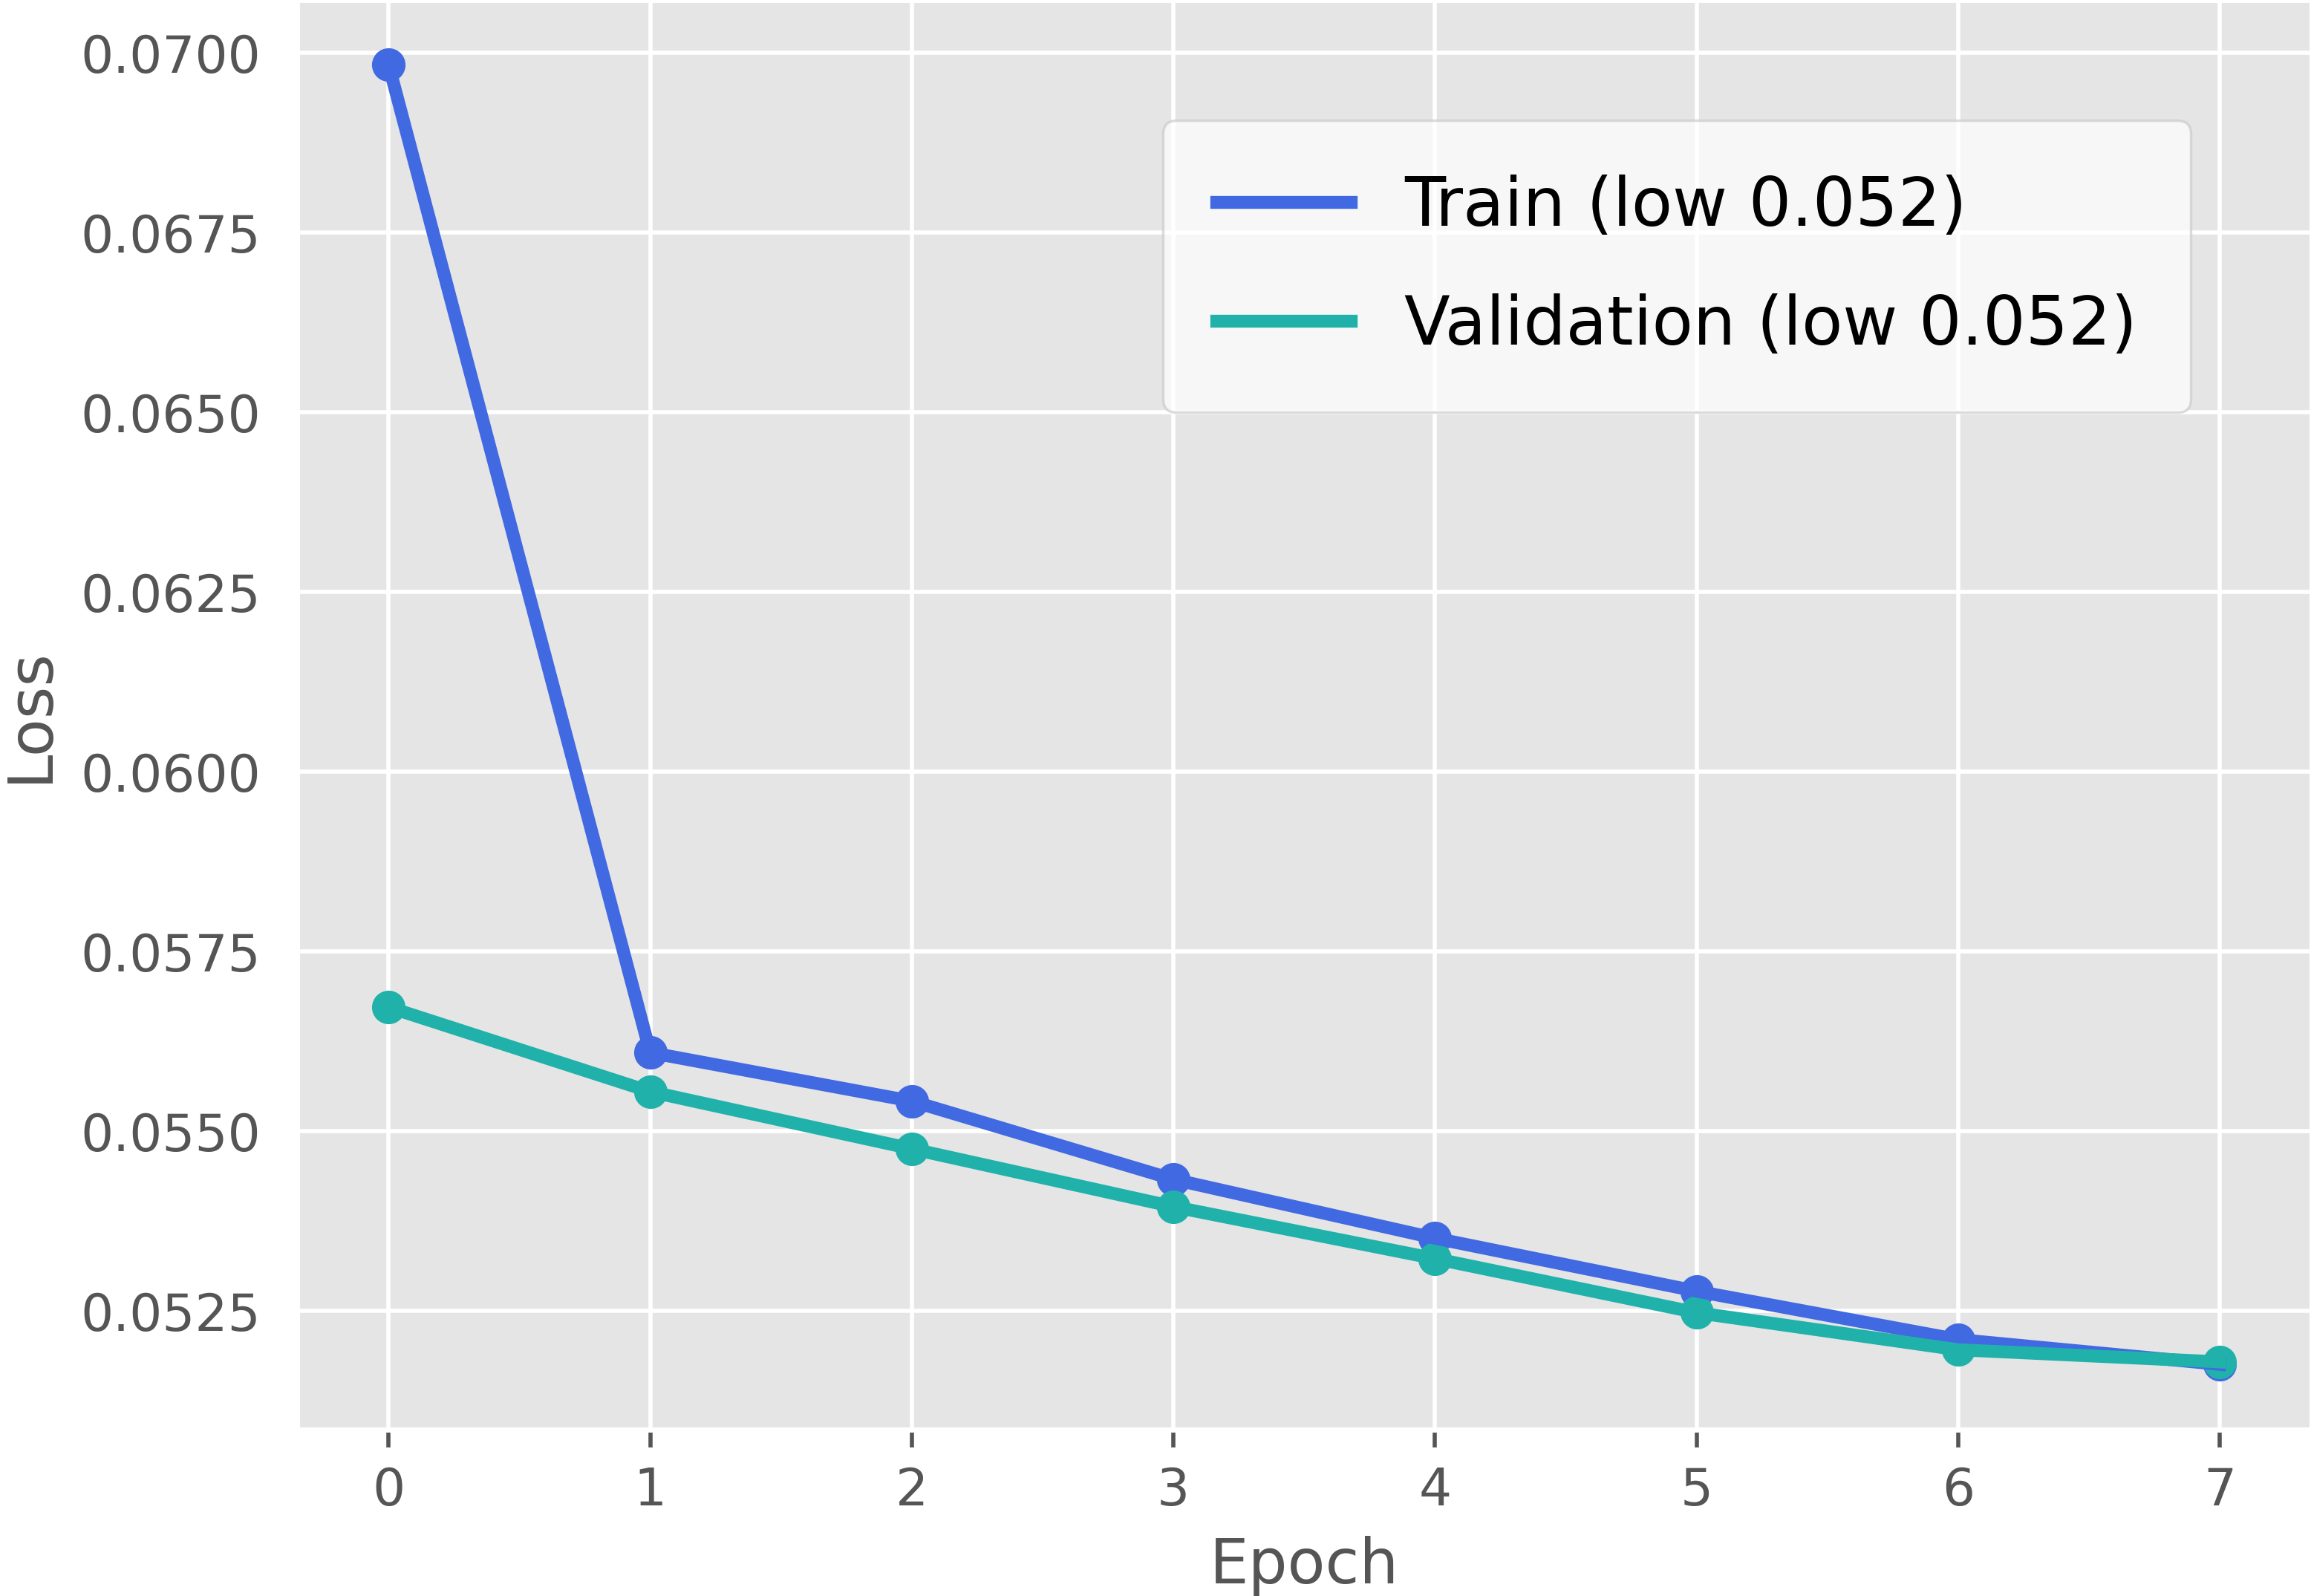

In [4]:
plot_pretrain('pretrain25')

## Training curves

In [53]:
def plot_train(labels, system):

    plt.style.use("ggplot")
    train_loss, val_loss, epochs = [], [], []
    val_acc1, val_acc5 = [], []

    with open(f'{labels}/' + system + '/log.txt', 'r') as file:
        for line in file:
            data = eval(line)
            train_loss.append(data['train_loss'])
            val_loss.append(data['val_loss'])
            epochs.append(data['epoch'])
            val_acc1.append(data['val_acc1'])
            val_acc5.append(data['val_acc5'])

    with open(f'{labels}/' + system + '/config.txt', 'r') as file:
        for line in file:
            if line.startswith("Training time:"):
                runtime = line.strip().split(" ")[-1]

    best_index = val_loss.index(min(val_loss))
    best_acc_index = val_acc1.index(max(val_acc1))
    
    plt.plot(epochs, train_loss, color="royalblue", label=f'Train (low {train_loss[best_index]:.3f})', linewidth=2.5)
    plt.plot(epochs, val_loss, color="lightseagreen", label=f'Validation (low {val_loss[best_index]:.3f})', linewidth=2.5)
    plt.scatter(epochs, train_loss, color="royalblue")
    plt.scatter(epochs, val_loss, color="lightseagreen")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.tick_params(left=False, right=False)
    plt.legend(fontsize=13, fancybox=True, borderpad=0.8, labelspacing=0.8, borderaxespad=1.8, framealpha=0.7, facecolor='white')
    
    print(f"Lowest Validation Loss: {val_loss[best_index]:.5f}")
    print(f"Corresponding Train Loss: {train_loss[best_index]:.5f}")
    print(f"Train time: {runtime}")
    print(f"Best Validation Acc@1: {val_acc1[best_acc_index]:.3f}")
    print(f"Corresponding Validation Acc@5: {val_acc5[best_acc_index]:.3f}")

    plt.show()

Lowest Validation Loss: 4.19824
Corresponding Train Loss: 4.07217
Train time: 0:09:48
Best Validation Acc@1: 8.492
Corresponding Validation Acc@5: 24.125


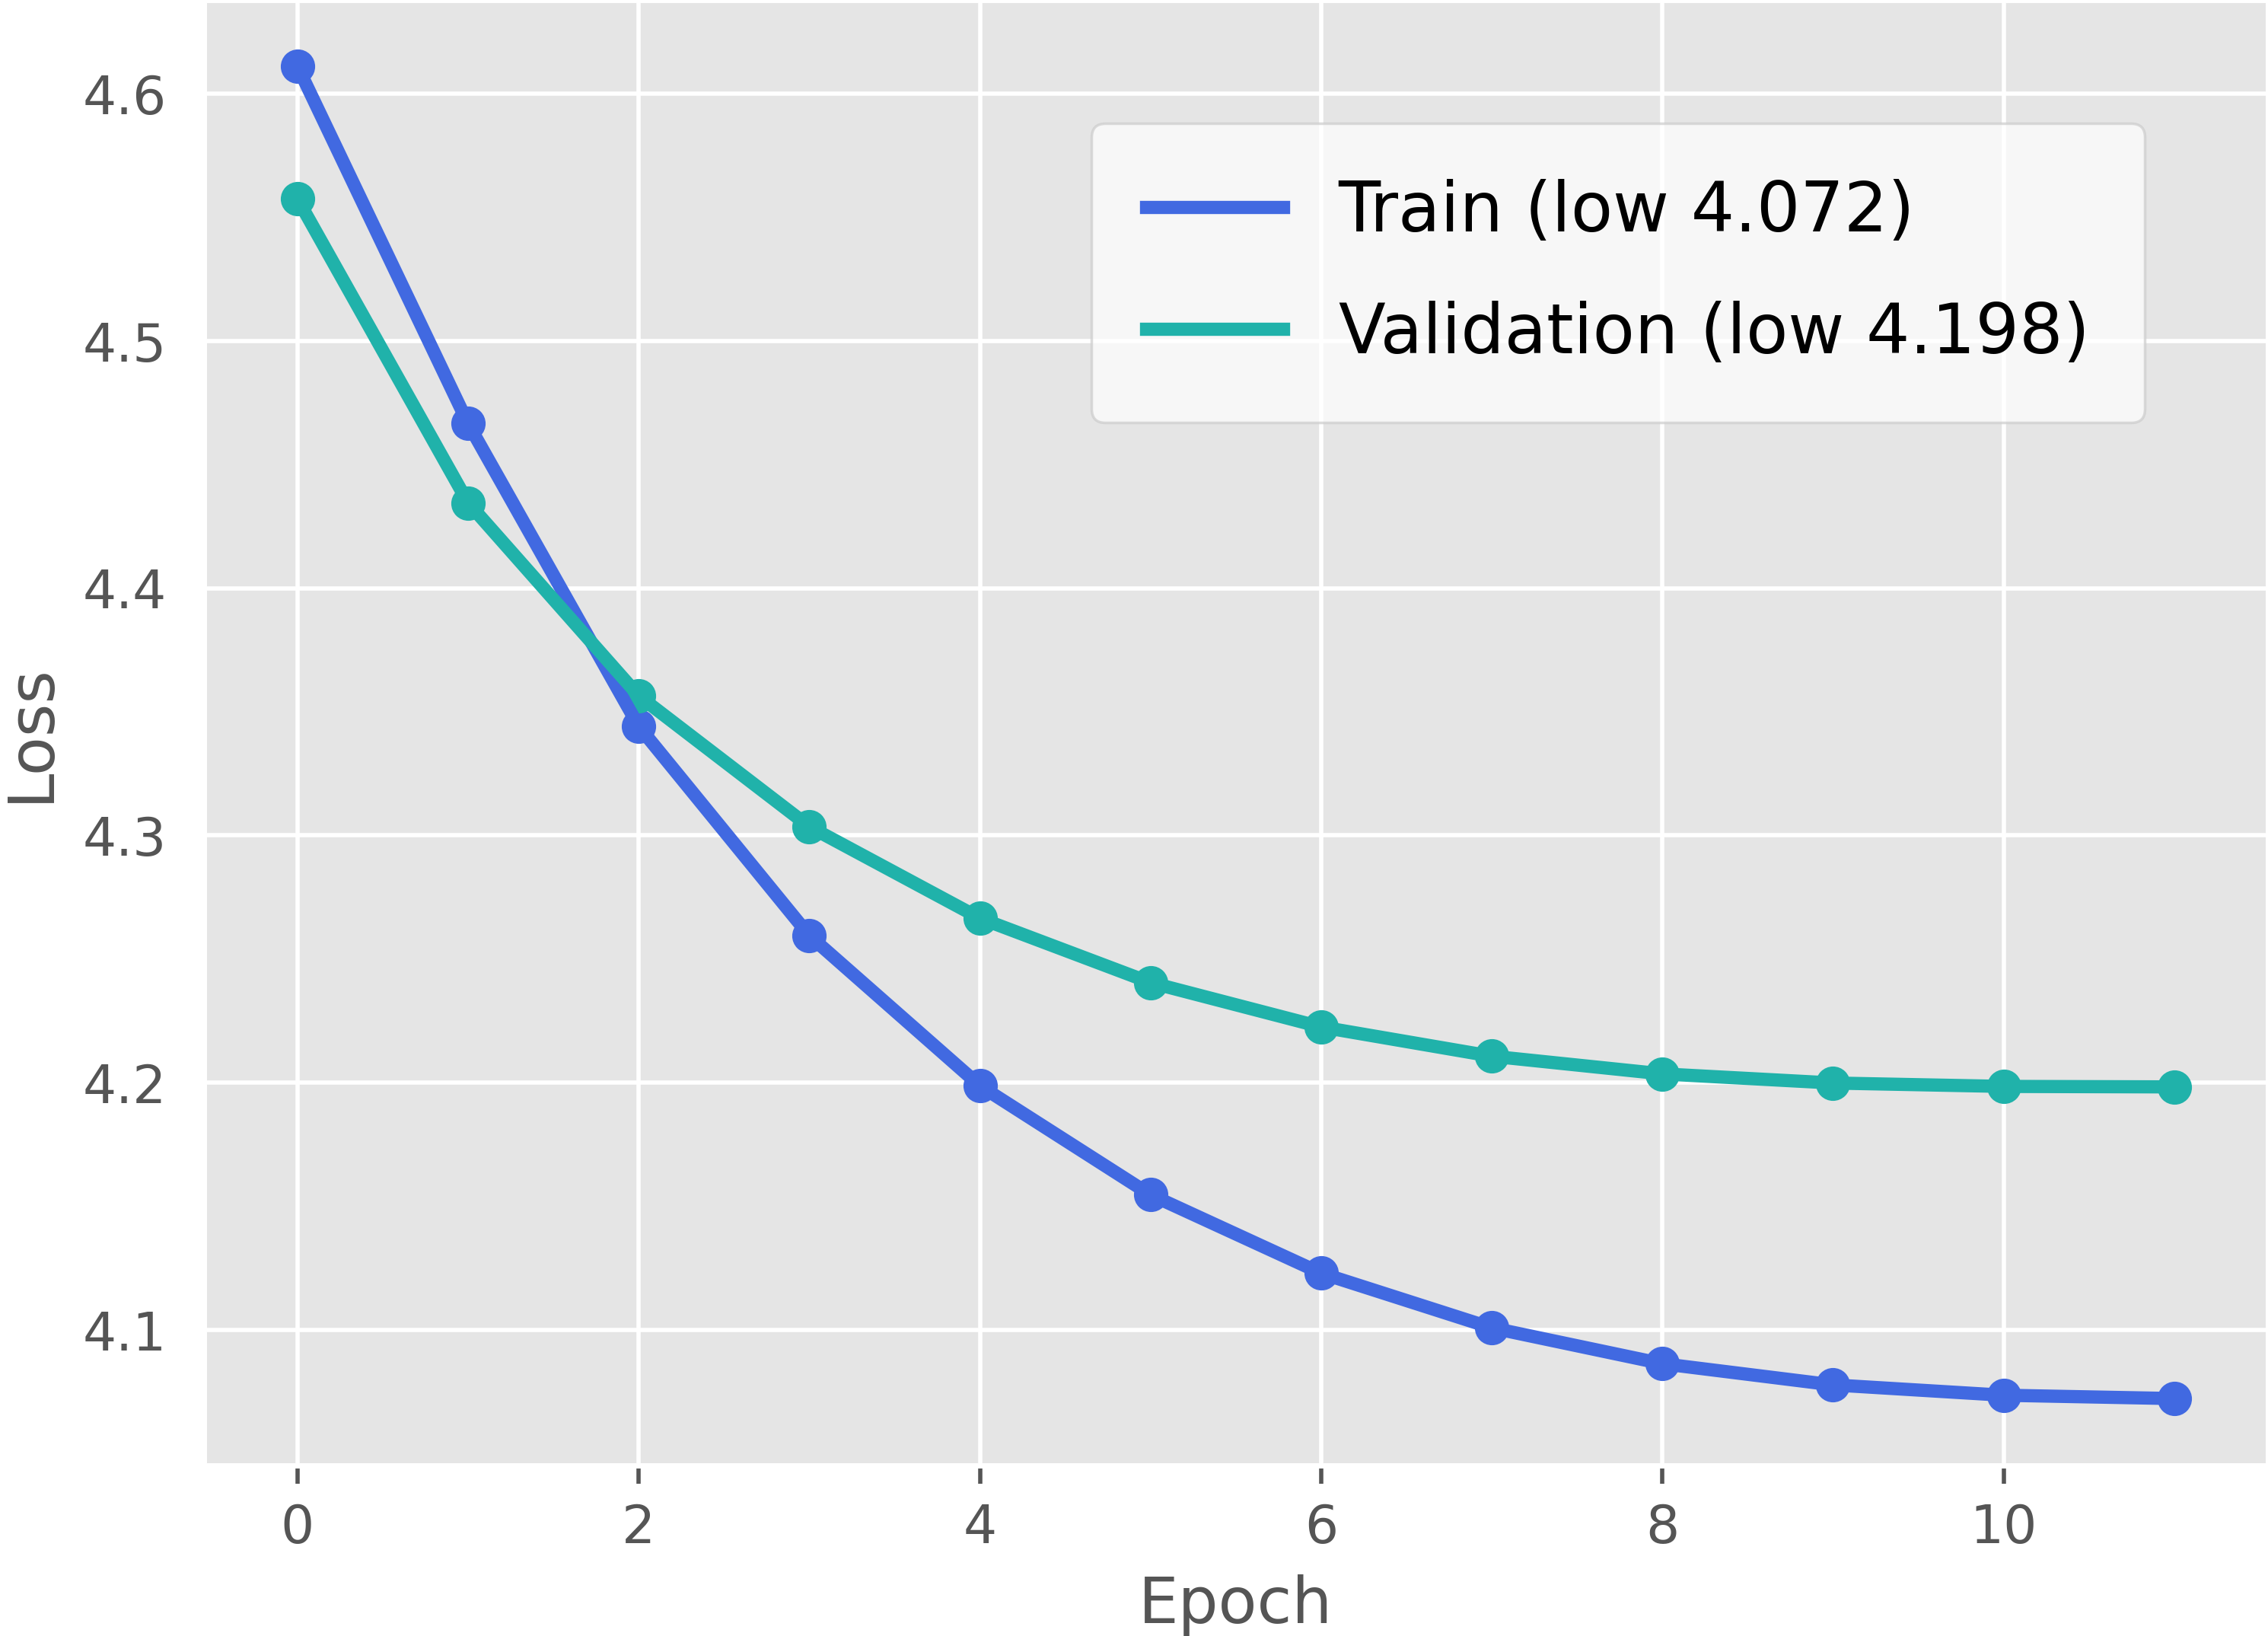

In [65]:
plot_train("probe100", "mask25")